# Tutorial 3 - Plotting

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator

import simple
simple.set_logging_level('INFO')

models = simple.load_collection('data/CCSNe_FeNi.hdf5')

Loading existing file: data/CCSNe_FeNi.hdf5
Loading file: data/CCSNe_FeNi.hdf5
Loading ref: W17 (IsoRef)
Loading ref: iniab2.0E-02GN93 (IsoRef)
Loading ref: iniab2.0E-02GN93_Lo03 (IsoRef)
Loading ref: iniab1.3E-02Lo03_Lo03_merged (IsoRef)
Loading ref: rau_solar_ref (IsoRef)
Loading ref: iniab1.3E-02As09_As09_merged (IsoRef)
Loading model: Ri18_m15 (CCSNe)
Loading model: Ri18_m20 (CCSNe)
Loading model: Ri18_m25 (CCSNe)
Loading model: Pi16_m15 (CCSNe)
Loading model: Pi16_m20 (CCSNe)
Loading model: Pi16_m25 (CCSNe)
Loading model: La22_m15 (CCSNe)
Loading model: La22_m20 (CCSNe)
Loading model: La22_m25 (CCSNe)
Loading model: Si18_m15 (CCSNe)
Loading model: Si18_m20 (CCSNe)
Loading model: Si18_m25 (CCSNe)
Loading model: Ra02_m15 (CCSNe)
Loading model: Ra02_m20 (CCSNe)
Loading model: Ra02_m25 (CCSNe)
Loading model: LC18_m15 (CCSNe)
Loading model: LC18_m20 (CCSNe)
Loading model: LC18_m25 (CCSNe)
Time to load file: 0:00:00.259696


---
## Plot Types
### Standard XY Plot


updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


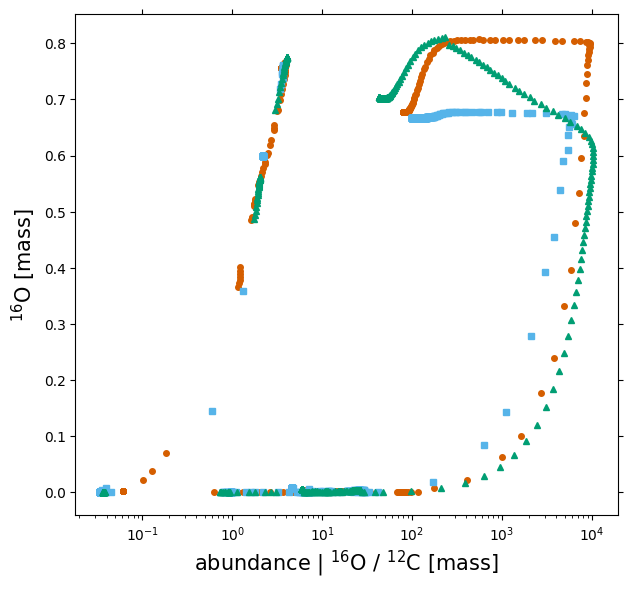

In [2]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02',
            ax_xscale='log', default_attrname='abundance');

updating figure DefaultKwargs.Dict({'size_inches': (10, 5)})


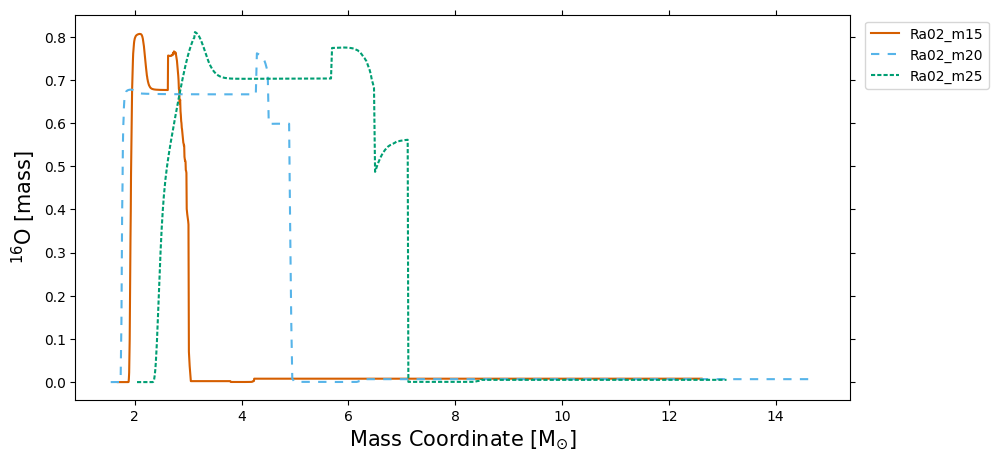

In [3]:
simple.plot_ccsne(models, 'o16', where='.dataset==Ra02', default_attrname='abundance');

### Histograms

Normalising weights so that the sum of all weights is equal to 1.


updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


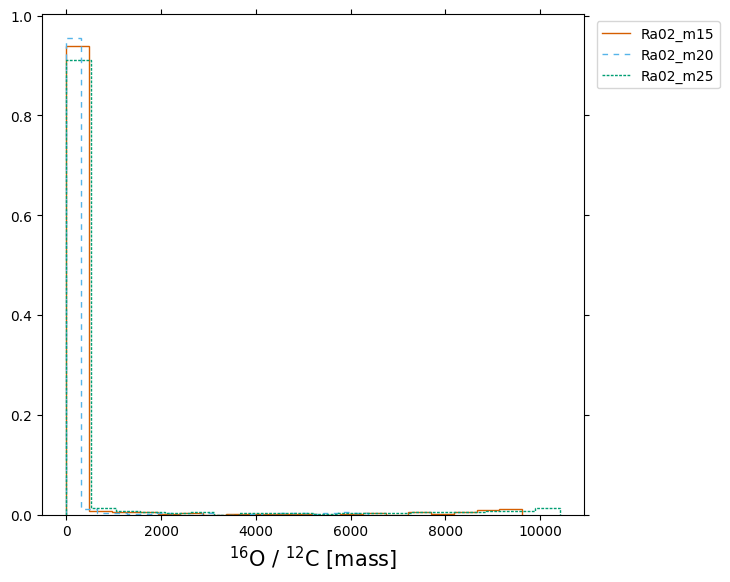

In [4]:
simple.hist(models, 'o16/c12', where='.dataset==Ra02', default_attrname='abundance');

Normalising weights so that the sum of all weights is equal to 1.


updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


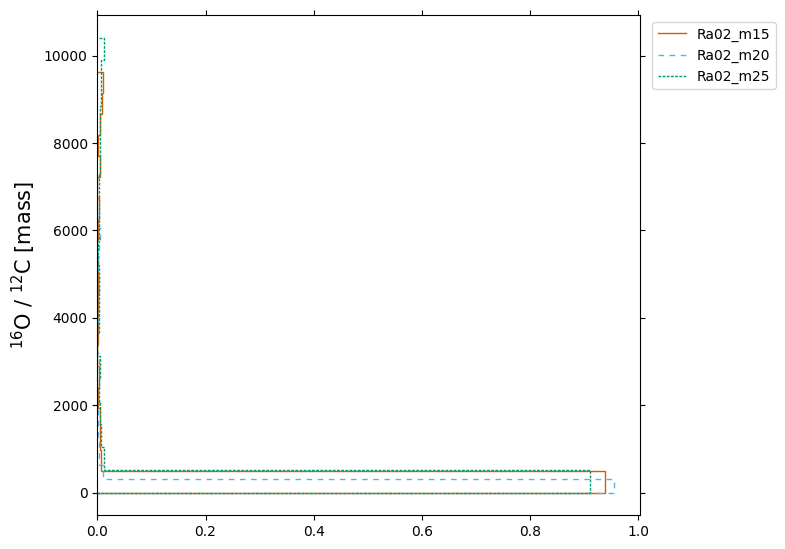

In [5]:
simple.hist(models, ykey='o16/c12', where='.dataset==Ra02', default_attrname='abundance');

If both ``xkey`` and ``ykey`` are given then a circular histogram of the x/y slope is shown on a custom [rose projection](https://mattias-ek.github.io/SIMPLE/api/roseaxes/#simple.roseaxes.RoseAxes), a subclass of the [polar projection](https://matplotlib.org/stable/api/projections/polar.html#matplotlib.projections.polar.PolarAxes).

**Note** if the original projection is not ``rose`` then the original plot will be deleted and replaced with a new plot with he right projection. This can lead to outdated references

Normalising weights so that the sum of all weights is equal to 1.
Wrong Axes projection for rose plot. Deleting axes and creating a new one.


updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


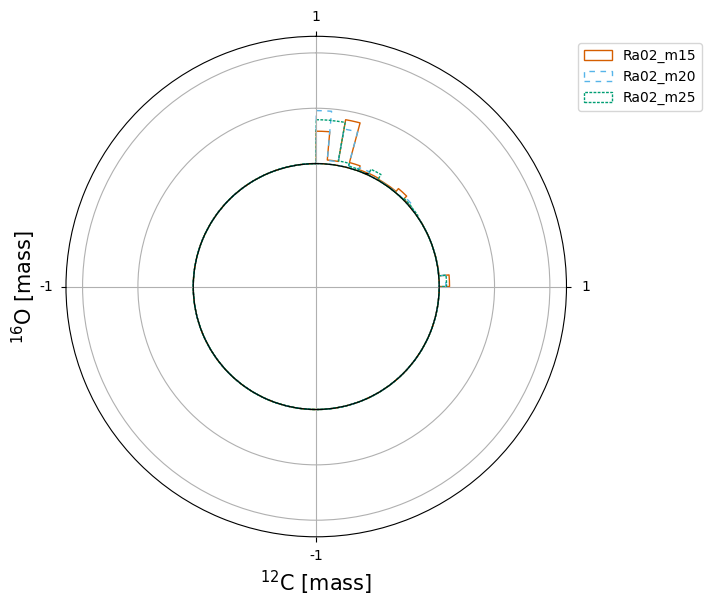

In [6]:
simple.hist(models, xkey='c12', ykey='o16', where='.dataset==Ra02', default_attrname='abundance');

### Slope Plots
The [slope plot](https://mattias-ek.github.io/SIMPLE/api/plotting/#simple.plotting.slope) shows mixing lines between the x and y values with an arrow pointing towards the end member location. For CCSNe models the slope for each mass coordinate is shown, which can lead to somewhat difficult to interpret figures such as the one below.

updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


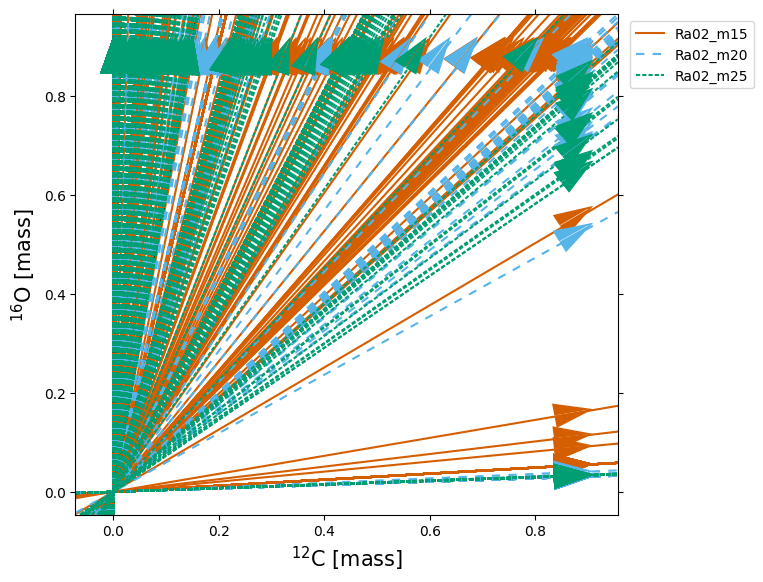

In [9]:
simple.slope(models, xkey='c12', ykey='o16', where='.dataset==Ra02', default_attrname='abundance');

## Combination plots
Creating a series of subplots can be done using the [``create_subplots``](https://mattias-ek.github.io/SIMPLE/api/plotting/#simple.plotting.create_subplots) function, which in turn is based on matplotlib's [``subplot_mosaic``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html#matplotlib.pyplot.subplot_mosaic) function.

Here we can compare the slope plot from above with a circular histogram. The histogram provides a much clearer idea of the distribution of the different slopes than the slope plot does.

updating figure DefaultKwargs.Dict({'size_inches': (12, 5.5)})


Normalising weights so that the sum of all weights is equal to 1.
Wrong Axes projection for rose plot. Deleting axes and creating a new one.


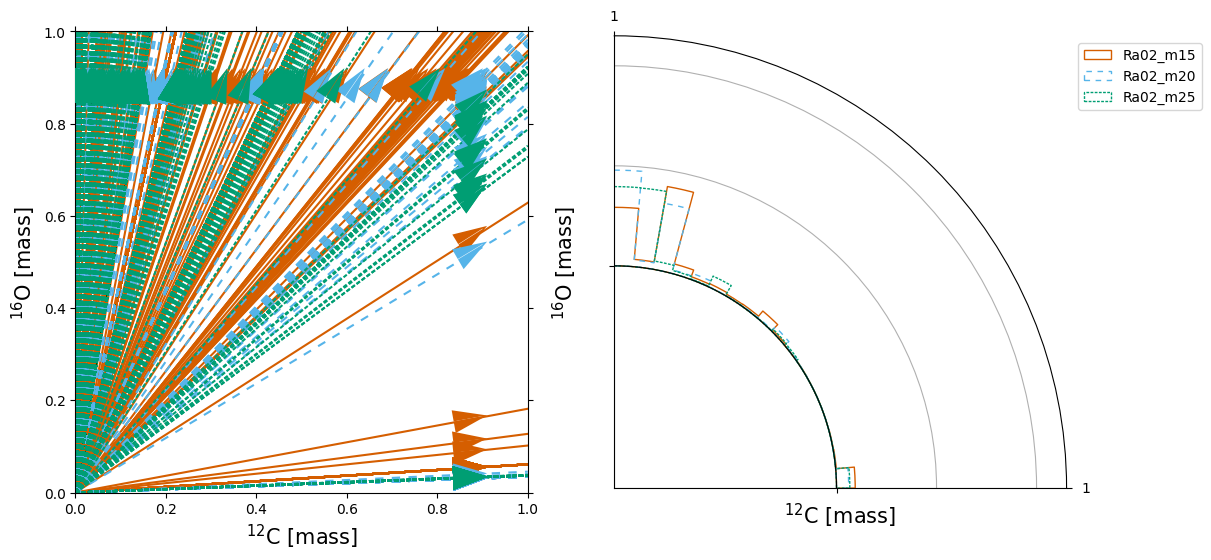

In [31]:
subplots = simple.create_subplots('AB', fig_size=(12, 5.5));
simple.slope(models, xkey='c12', ykey='o16', where='.dataset==Ra02', default_attrname='abundance',
             ax=subplots['A'], legend=False, ax_xlim=(0, 1), ax_ylim=(0, 1));
simple.hist(models, xkey='c12', ykey='o16', where='.dataset==Ra02', default_attrname='abundance', rose_segment='NE', ax=subplots['B']);

The standard plot has the built-in option to automatically create histograms for each axis using the ``hist`` argument. You choose only a single axis using ``xhist`` or ``yhist`` instead.

**Note** that in this example the width of the bins is still linear which is why the bin size is uneven for the logarithmic x-axis in the example below.

Normalising weights so that the sum of all weights is equal to 1.


updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})
updating figure DefaultKwargs.Dict({'size_inches': False})
updating figure DefaultKwargs.Dict({'size_inches': False})


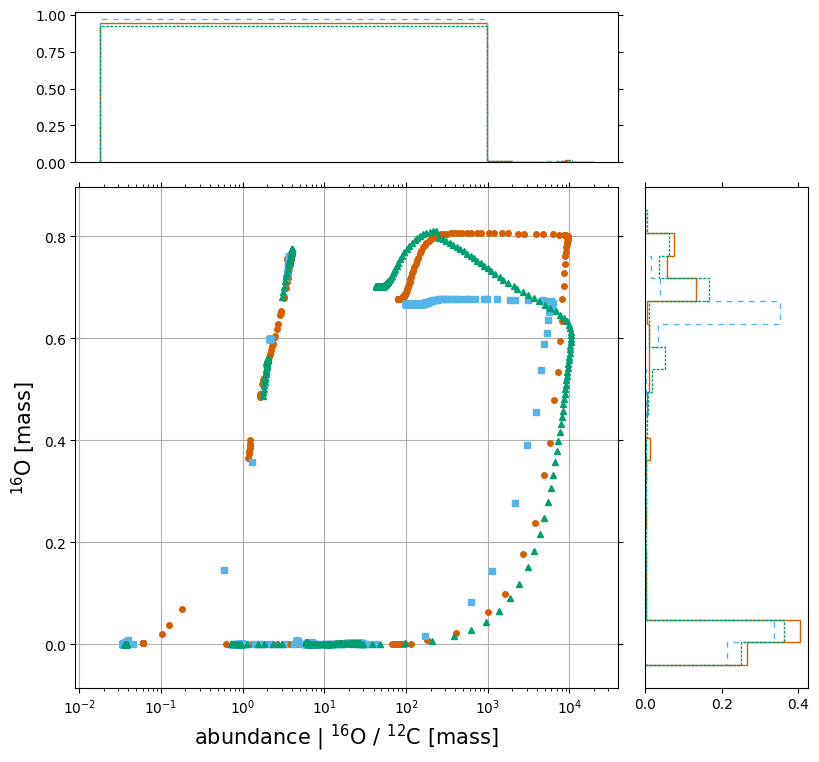

In [30]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02',
            ax_xscale='log', default_attrname='abundance', hist=True);

This also works for the CCSNe plot however by default no histogram is shown for the mass coordinates on the x-axis. Keep in mind that the histogram will look different for the CCSNe plot due to the difference in how the weight for each data point is calculated.

Multiplying all weights by the mass coordinate mass
Normalising weights so that the sum of all weights is equal to 1.


updating figure DefaultKwargs.Dict({'size_inches': (10, 5)})
updating figure DefaultKwargs.Dict({'size_inches': False})


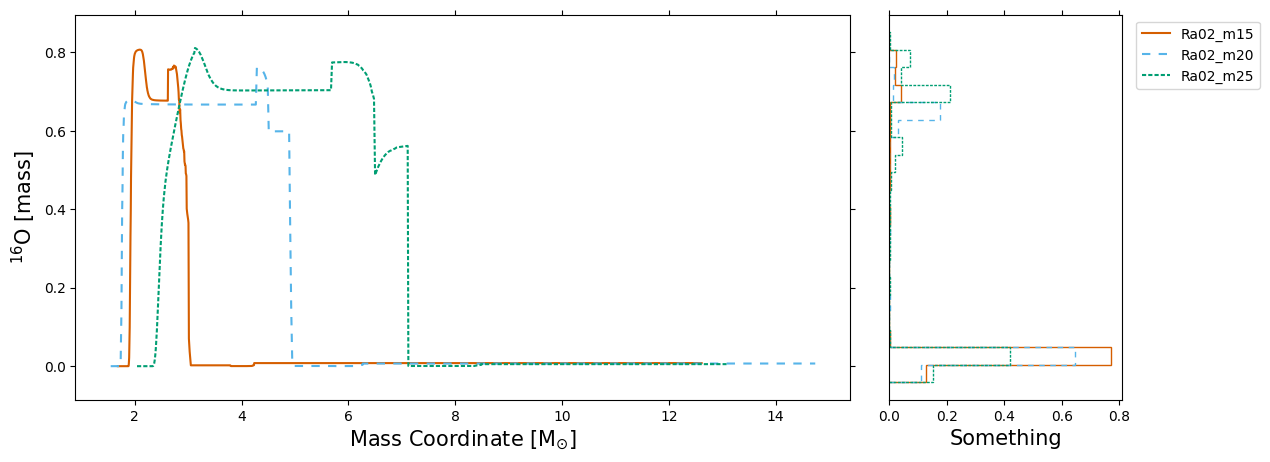

In [8]:
simple.plot_ccsne(models, 'o16', where='.dataset==Ra02', default_attrname='abundance', hist=True, yhist_ax_xlabel='Something');

In this instance a circular histogram high be more appropriate to view the data. Given that both the x and y data are positive values we can tell the histogram to show only this segment for further clarity.

Shown side by side we can see that the histogram provides a better understanding the most common slopes.

---
## Adjusting Plots
### Customising labels
Informative labels are autogenerated by the plotting functions. By default, information that is common to all data points is included in the axis labels to keep the data point labels short. Information that can be contained in the labels are: name of the attribute, or its label if one has been defined, the isotope or ratio key, the unit of the data, and finally the model name. The inclusion of these can be modified using the appropriate argument, see the [``get_data()``]() function for more details. 

By default, the attribute name is included in the label only if is different than the one defined by the ``default_attrname`` or the attribute name is defined in the key.

updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


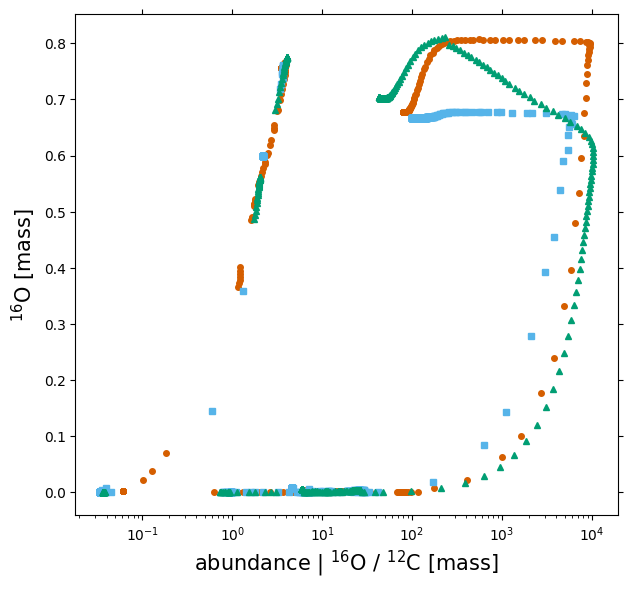

In [12]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02', 
            ax_xscale='log', default_attrname='abundance');

To change the label behaviour you can give either a single argument that is used for all axis or you can supply a list containing one value per axis. It is also possible to specify the value for a single axis by prefixing the argument name with the name of the axis, e.g. ``xunit_in_label``. This will override any argument passed to the generic argument for this axis.



updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


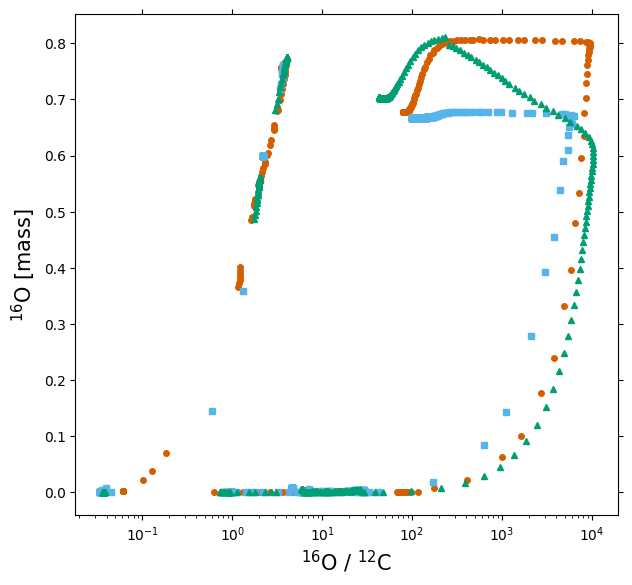

In [13]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02', 
            ax_xscale='log', attrname_in_label=False, xunit_in_label=False);

You can provide your own labels to the datapoints by giving a list to the ``label`` argument. Similarly, you can define the axis labels by prefixing the label argument by the axis name as in the example below.

updating figure DefaultKwargs.Dict({'size_inches': (7, 6.5)})


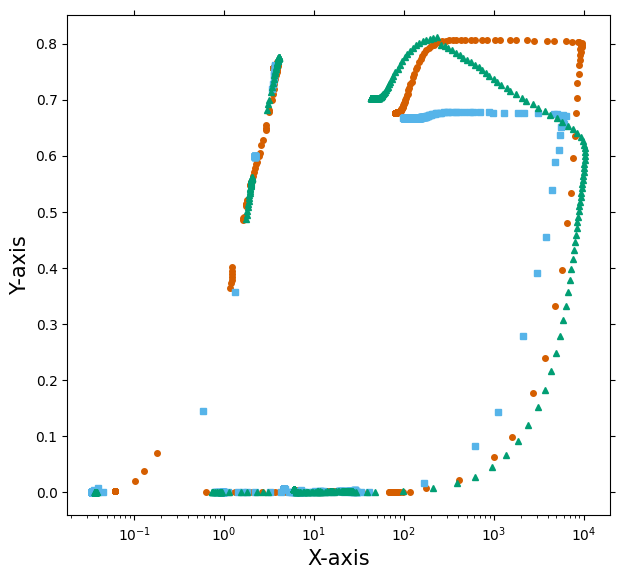

In [14]:
simple.plot(models, '.abundance[o16/c12]', 'o16', where='.dataset==Ra02', 
            ax_xscale='log', label=['a', 'b', 'c'], xlabel='X-axis', ylabel='Y-axis');

### Styling Plots
The SIMPLE plotting functions allow you to update the ``axes`` or ``figure`` object using keyword arguments. To update the ``axes`` object pass the name of the method, minus the ``set_`` part, with the prefix ``ax_`` equal to the desired value, e.g. ``ax_ylim=(1,2)``. You can do the same for ``axes.xaxis`` and ``axis.yaxis`` methods using the prefix ``xax_`` and ``yax_``. To update the figure object use the prefix ``fig_``. 

You can pass multiple arguments to the methods by passing a tuple or a dictionary which will be unpacked when the method is called. You can also define keyword arguments separately using the ``ax_kw_<method>_<keyword>`` prefix. Note however that the method is only called is the ``ax_<method>`` argument is also present. Setting the ``ax_<method>`` to ``False`` will not call the function while setting it to ``True`` will call the method with no arguments, unless keyword arguments are specified as described above. To pass a boolean value to a method simple place it within a tuple, e.g. ``(True, )``. 

If you want to reuse the same style arguments repeatedly you can place them in a dictionary and unpack it when needed.



Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


updating figure DefaultKwargs.Dict({'size_inches': (10, 5)})


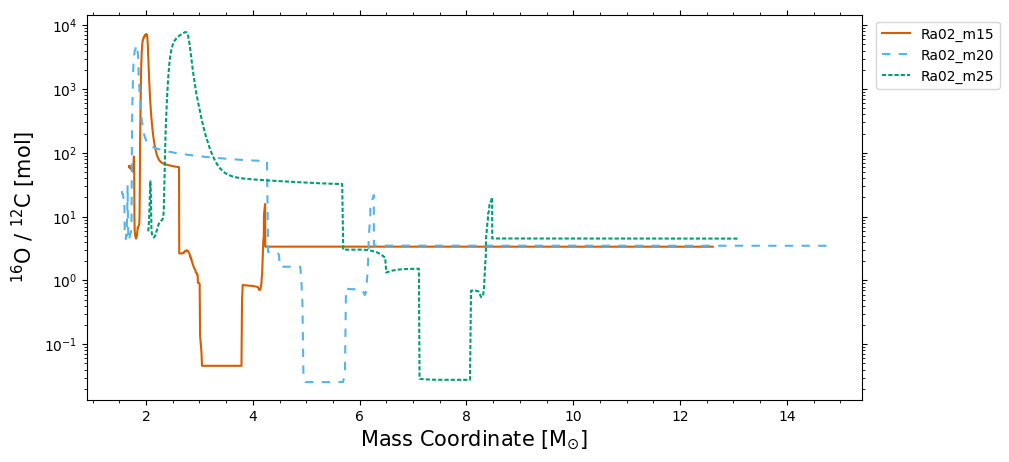

In [15]:
abundance_kwargs = {'ax_tick_params': dict(left=True,right=True,top=True,labelleft=True,which='both'),
                    'xax_minor_locator': AutoMinorLocator(), 
                    'yax_major_locator': LogLocator(subs=(1.0, ),numticks=999),
                    'yax_minor_locator': LogLocator(numticks=999, subs='auto'),
                    'ax_yscale': 'log'}

simple.plot_ccsne.abundance(models, 'o16/c12', where='.dataset==Ra02', unit='mol',
                            **abundance_kwargs);

In [16]:
slope_kwargs = {'ax_tick_params': dict(left=True,right=True,top=True,labelleft=True,which='both'),
                'xax_minor_locator': AutoMinorLocator(), 
                'yax_minor_locator': AutoMinorLocator()}

### Updating the Default Style
The default style of the plotting functions can be found through the ``kwargs`` attribute.

In [17]:
simple.plot.kwargs

DefaultKwargs.Dict({'default_attrname': None, 'unit': None, 'where': None, 'mask': None, 'mask_na': True, 'ax': None, 'legend': None, 'update_ax': True, 'update_fig': True, 'hist': False, 'hist_size': 0.3, 'hist_pad': 0.05, 'linestyle': False, 'color': True, 'marker': True, 'fixed_model_linestyle': None, 'fixed_model_color': None, 'fixed_model_marker': None, 'ax_kw_xlabel_fontsize': 15, 'ax_kw_ylabel_fontsize': 15, 'markersize': 4, 'legend_outside': True, 'ax_tick_params': {'axis': 'both', 'left': True, 'right': True, 'top': True}, 'fig_size': (7, 6.5)})

The ccsne plotting functions inherits the style of the generic plotting functions. Similarly, by default, shortcuts will inherit the style of the plotting function they are attached to. The ``kwargs`` attribute contains all the kwargs of the function, including inherited ones.

In [18]:
simple.plot_ccsne.kwargs

DefaultKwargs.Dict({'default_attrname': None, 'unit': None, 'where': None, 'mask': None, 'mask_na': True, 'ax': None, 'legend': None, 'update_ax': True, 'update_fig': True, 'hist': False, 'hist_size': 0.3, 'hist_pad': 0.05, 'linestyle': True, 'color': True, 'marker': False, 'fixed_model_linestyle': None, 'fixed_model_color': None, 'fixed_model_marker': None, 'ax_kw_xlabel_fontsize': 15, 'ax_kw_ylabel_fontsize': 15, 'markersize': 4, 'legend_outside': True, 'ax_tick_params': {'axis': 'both', 'left': True, 'right': True, 'top': True}, 'fig_size': (10, 5), 'semilog': False, 'onion': None, 'xhist': False})

In [19]:
simple.plot_ccsne.abundance.kwargs

DefaultKwargs.Dict({'default_attrname': 'abundance', 'unit': None, 'where': None, 'mask': None, 'mask_na': True, 'ax': None, 'legend': None, 'update_ax': True, 'update_fig': True, 'hist': False, 'hist_size': 0.3, 'hist_pad': 0.05, 'linestyle': True, 'color': True, 'marker': False, 'fixed_model_linestyle': None, 'fixed_model_color': None, 'fixed_model_marker': None, 'ax_kw_xlabel_fontsize': 15, 'ax_kw_ylabel_fontsize': 15, 'markersize': 4, 'legend_outside': True, 'ax_tick_params': {'axis': 'both', 'left': True, 'right': True, 'top': True}, 'fig_size': (10, 5), 'semilog': False, 'onion': None, 'xhist': False})

You can update the default style using the ``update``, ``remove`` and ``clear`` methods.

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


updating figure DefaultKwargs.Dict({'size_inches': (10, 5)})


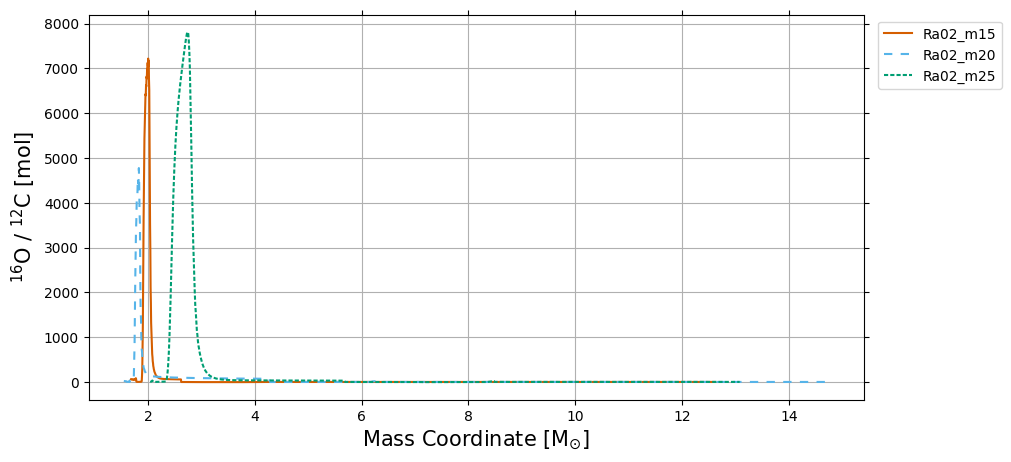

In [20]:
simple.plot.update(ax_tick_params = dict(left=True,right=True,top=True,labelleft=True,which='both'),
                   ax_grid = (True,))

simple.plot_ccsne.abundance(models, 'o16/c12', where='.dataset==Ra02', unit='mol');

### Shortcuts
Shortcuts are a convenient way to predefine a set of arguments for a plotting function. For example the ``intnorm`` and ``stdnorm`` shortcut sets the ``default_attrname`` to the path of the result from these normalisations. Using these shortcuts means you only have to specify the isotope or ratio you want to plot.

You can create your own shortcuts using the ``add_shortcut`` function attached to anything with a ``kwargs`` dictionary.

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


updating figure DefaultKwargs.Dict({'size_inches': (10, 5)})


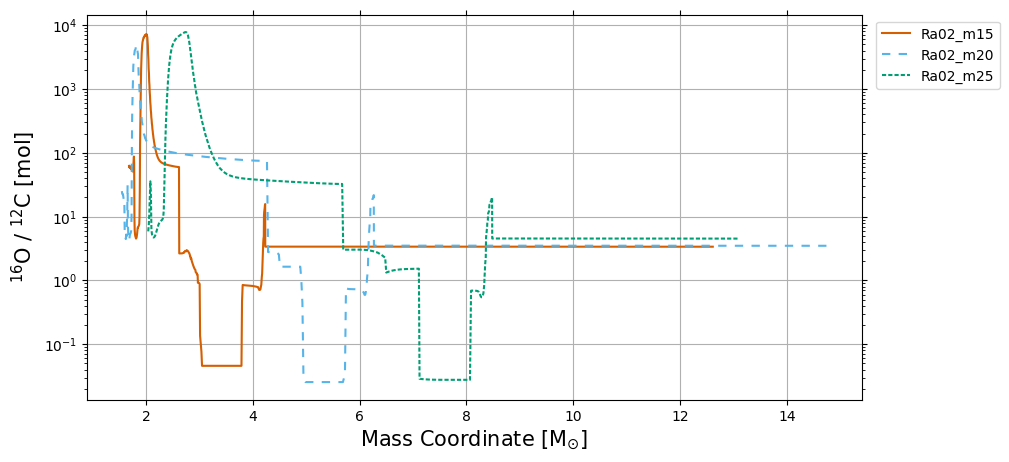

In [21]:
simple.plot_ccsne.add_shortcut('abulogy', ax_yscale='log', default_attrname='abundance')
simple.plot_ccsne.abulogy(models, 'o16/c12', where='.dataset==Ra02', unit='mol');

### Subplots
You can specify the axes that is used for the plot using the ``ax`` argument. To create a series of subplots you can use the matplotlib [``plt.subplot_mosaic``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html) function and then use the ``ax`` argument to specify the subplot.

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


updating figure DefaultKwargs.Dict({'size_inches': (10, 5)})
updating figure DefaultKwargs.Dict({'size_inches': (10, 6)})


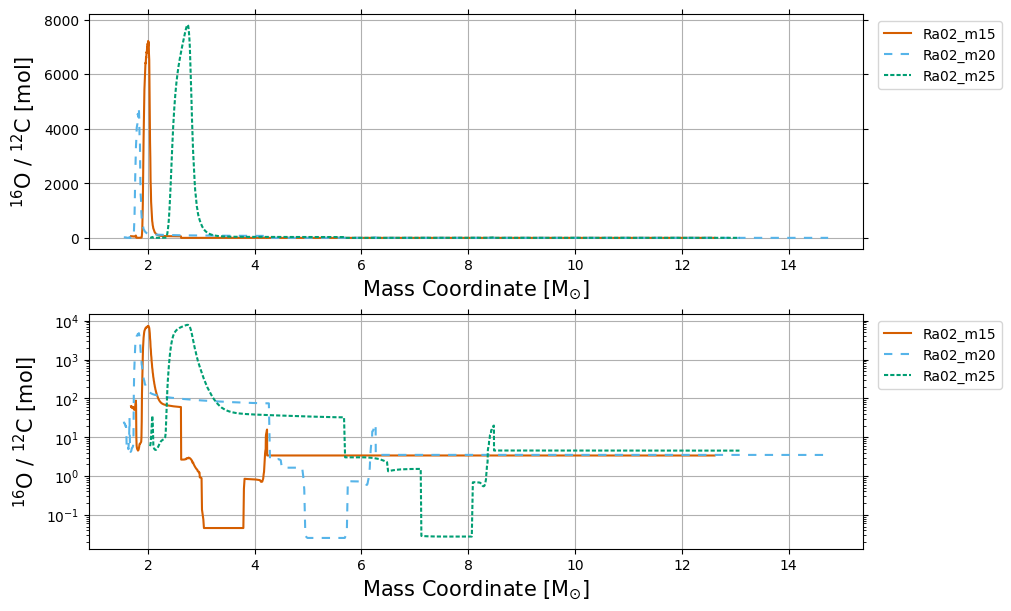

In [22]:
fig, subplots = plt.subplot_mosaic([['A'], ['B']], layout='constrained', figsize=(10,10))
simple.plot_ccsne.abundance(models, 'o16/c12', where='.dataset==Ra02', unit='mol', ax=subplots['A']);
simple.plot_ccsne.abulogy(models, 'o16/c12', where='.dataset==Ra02', unit='mol', ax=subplots['B'], fig_size=(10,6));

---
## Creating Custom Plots
The ``get_data`` function allows you to extract data to create your own plotting functions. 

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


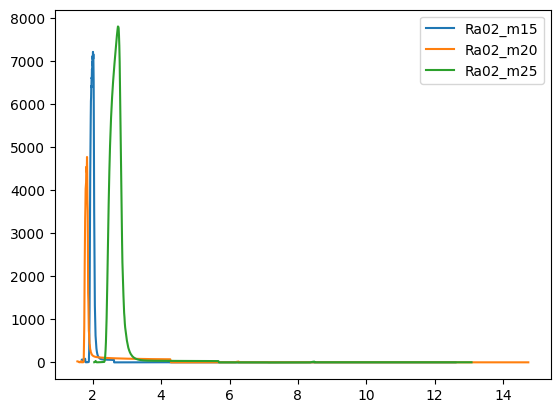

In [23]:
model_datapoints, axis_labels = simple.get_data(models, 'x, y', xkey='.masscoord', ykey='.abundance[o16/c12]', 
                                                where='.dataset==Ra02', yunit='mol')

plt.set_xlabel = axis_labels['x']
plt.set_ylabel = axis_labels['y']

# Iterate though the data and plot it
for model_name, datapoints in model_datapoints.items():
    for dp in datapoints:
        plt.plot(dp['x'], dp['y'], label=dp['label'])
        
plt.legend();

The ``update_axes`` function allows you to update the axes, axis and figure objects using the same arguments used for the simple plotting functions. If you want the plots to look similar you can copy the ``default_kwargs`` dictionary of the plotting function. The ``create_legend`` function can also be used to place the legend outside the plot.

You can also import the ``parse_lscm`` function from ``simple.plotting`` to get the default linestyles, colors and marker shapes.

Ra02_m15.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m20.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number
Ra02_m25.abundance: Converting array from ``mass`` to ``mole`` unit by dividing the data by the mass number


updating figure DefaultKwargs.Dict({'size_inches': (10, 5)})


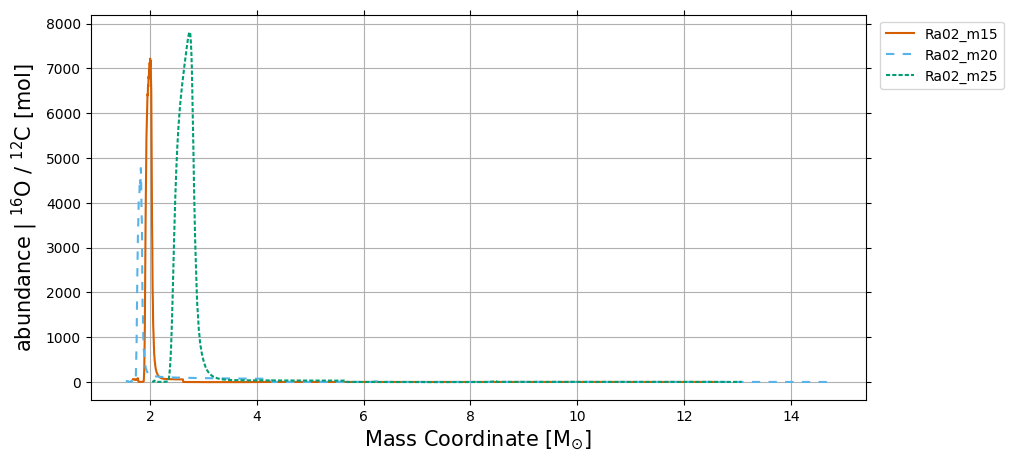

In [24]:
from simple.plotting import parse_lscm

model_datapoints, axis_labels = simple.get_data(models, 'x, y', xkey='.masscoord', ykey='.abundance[o16/c12]', 
                                                where='.dataset==Ra02', yunit='mol')

# The account for the inheritance of default kwargs
default_kwargs = simple.plot_ccsne.kwargs

default_kwargs['ax_xlabel'] = axis_labels['x']
default_kwargs['ax_ylabel'] = axis_labels['y']
simple.update_axes(plt, default_kwargs)

# Get the default linestyles and colours, and disable markers
ls, c, m = parse_lscm(linestyle=default_kwargs.get('linestyle', True), 
                      color=default_kwargs.get('color', True),
                      marker=default_kwargs.get('marker', False))

# Iterate though the data and plot it
for i, (model_name, datapoints) in enumerate(model_datapoints.items()):
    for j, dp in enumerate(datapoints):
        plt.plot(dp['x'], dp['y'], label=dp['label'], linestyle=ls[i], color=c[i], marker=m[i])
        
simple.create_legend(plt, outside=True)